# Sheema Masood
## DSAI BAtch 6
## ASSIGNMENT ON KMeans Clustering

## Objective ; Create Clustering Using K-Means Algorithm On Mall Customers Dataset

### Import Libraries

In [151]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Load & Read Data 

In [152]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [154]:
df.shape

(200, 5)

In [155]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### DISTRIBUTION OF FEATURES

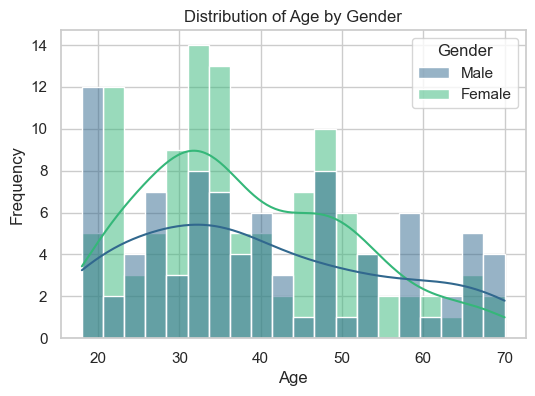

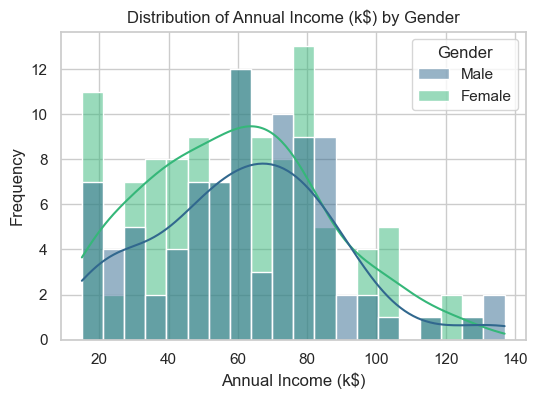

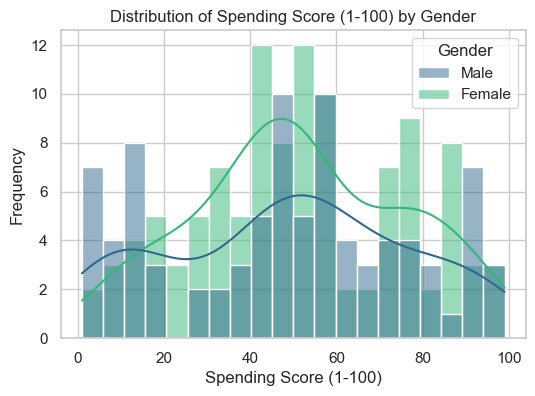

In [156]:
# List of features to plot
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Loop through the features and create a plot for each
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='Gender', bins=20, kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Gender')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.savefig(f'Distribution of {feature} by Gender')
    plt.show()

## PAIR PLOTS BETWEEN FEATURES

<Figure size 1200x1000 with 0 Axes>

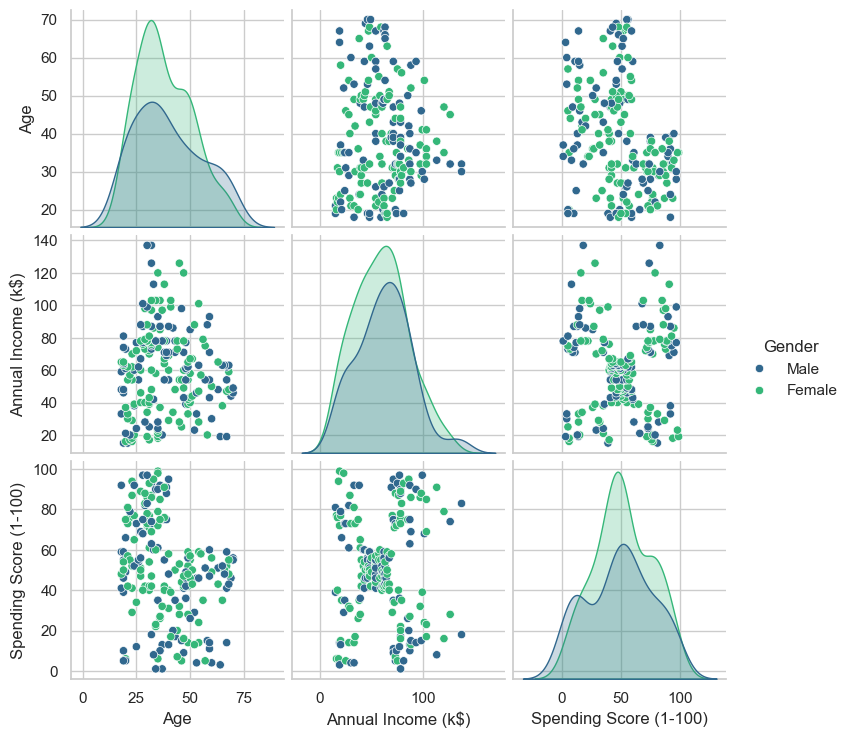

In [157]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='viridis')
plt.savefig('Pair Plot Visualization of features')
plt.show()

### CORRELATION HEATMAP

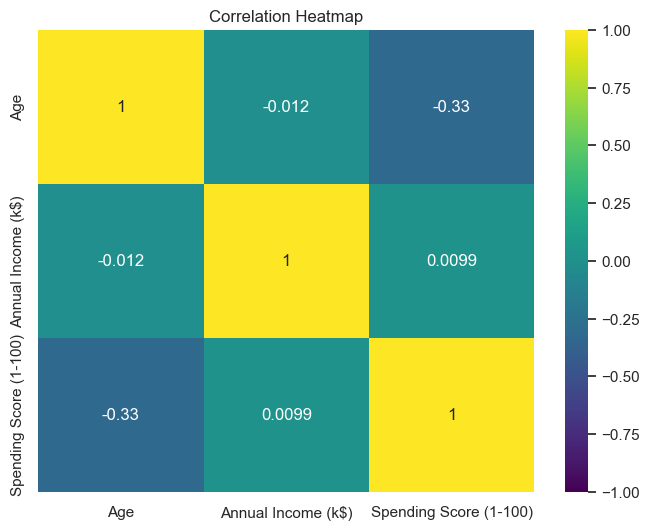

In [158]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap')
plt.show()


## SPENDING SCORE WITHE AGE AND GENDER

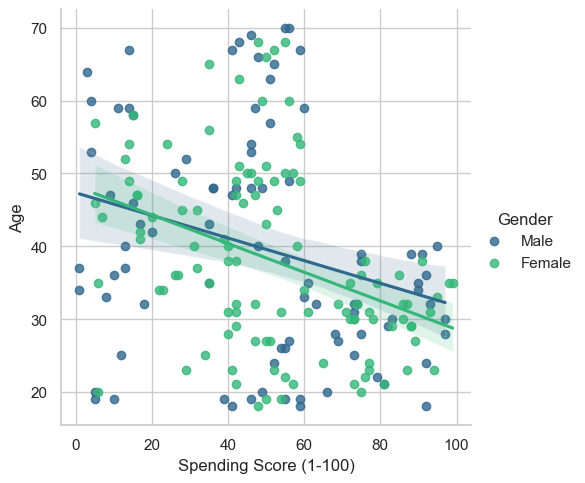

In [159]:
sns.lmplot(df,x = 'Spending Score (1-100)' , y='Age' , hue = 'Gender', palette = 'viridis')
plt.savefig('Spending Score Scatter Plot with Implot bY Gender')

### GENDER VISUALIZATION

In [160]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Female    112
Male       88
Name: count, dtype: int64

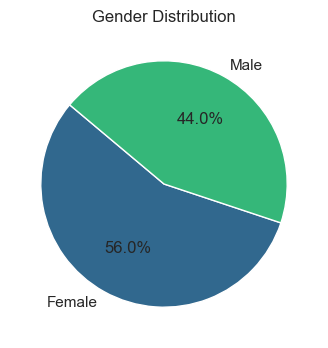

In [161]:
colors = sns.color_palette('viridis', len(gender_counts))

plt.figure(figsize=(4,4 ))
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.savefig('Gender Distribution')
plt.show()

## Scaling & Transform Data

In [162]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features = ['Gender'] 

# transformer
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())  # Encode categorical features
])

#  preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [163]:
X_transformed = preprocessor.fit_transform(df)

In [164]:
ordinal_feature_names = [f'{col}_encoded' for col in categorical_features]  # Feature names for encoded categorical features
feature_names = numerical_features + ordinal_feature_names

In [165]:
transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

transformed_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,-1.424569,-1.738999,-0.434801,1.0
1,-1.281035,-1.738999,1.195704,1.0
2,-1.352802,-1.700830,-1.715913,0.0
3,-1.137502,-1.700830,1.040418,0.0
4,-0.563369,-1.662660,-0.395980,0.0


In [166]:
import os

# Set the environment variable to limit the number of threads
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.cluster import KMeans

##  Determine Optimal Number of Clusters

C:\Users\muhammad mohsin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\muhammad mohsin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\muhammad mohsin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\muhammad mohsin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

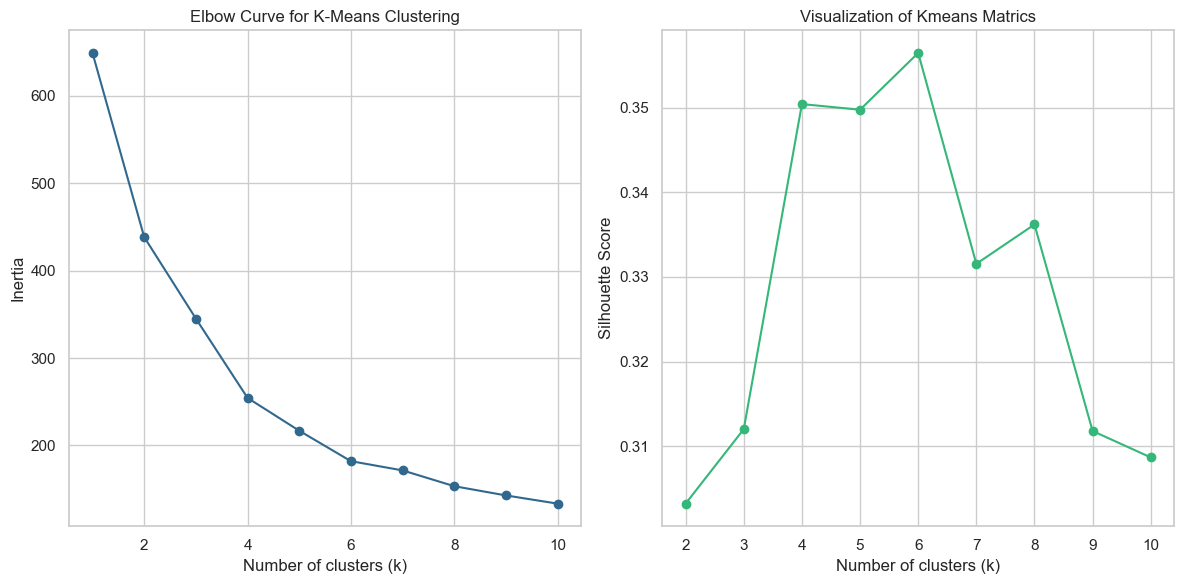

In [167]:
inertia = []
silhouette_scores = []

# Perform K-Means clustering for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_df)
    inertia.append(kmeans.inertia_)
    
    if k > 1:
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(transformed_df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

# colour
sns.set(style='whitegrid')
colors = sns.color_palette('viridis', n_colors=2)

# Plot the elbow curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o', color=colors[0])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid(True)

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o', color=colors[1])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.grid(True)

plt.tight_layout()
plt.title('Visualization of Kmeans Matrics')
plt.savefig('Visualization of Kmeans Matrics')
plt.show()


## Train Final Model

In [168]:
# best k by elbow method is 
optimal_k = 6

# Train final K-Means model
kmeans_final = KMeans(n_clusters = optimal_k, random_state = 42)
final_labels = kmeans_final.fit_predict(transformed_df)

C:\Users\muhammad mohsin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [169]:
# Add the cluster labels to your DataFrame
transformed_df['Cluster'] = final_labels
transformed_df.sample(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,Cluster
126,0.297832,0.398489,-0.590088,1.0,3
140,1.302565,0.551167,-1.754735,0.0,3
71,0.584899,-0.441239,-0.318337,0.0,0
59,1.015499,-0.555747,-0.163051,1.0,0
37,-0.635135,-1.013780,0.885132,0.0,4


## Evaluate the Model

In [170]:
# Evaluate cluster centers
centers = kmeans_final.cluster_centers_
print("Cluster Centers:\n", centers)

# Analyze cluster sizes
cluster_sizes = pd.Series(final_labels).value_counts()
print("Cluster Sizes:\n", cluster_sizes)

Cluster Centers:
 [[ 1.25472096 -0.24021294 -0.04399777  0.42222222]
 [-0.44191719  0.99158305  1.23950275  0.46153846]
 [ 0.47895722 -1.30822992 -1.19644353  0.38095238]
 [ 0.17329545  1.06645385 -1.2980103   0.58823529]
 [-0.99396865 -1.34734766  1.06404834  0.43478261]
 [-0.85043527 -0.14894113 -0.04147777  0.34210526]]
Cluster Sizes:
 0    45
1    39
5    38
3    34
4    23
2    21
Name: count, dtype: int64


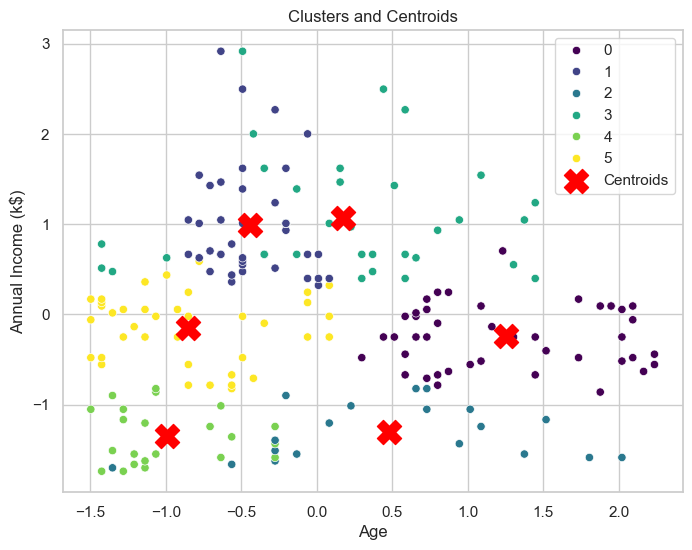

In [171]:
plt.figure(figsize=(8, 6))

# Scatter plot of clusters
sns.scatterplot(x=transformed_df.iloc[:, 0], y=transformed_df.iloc[:, 1], hue='Cluster', data=transformed_df, palette='viridis', legend='full')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters and Centroids')
plt.xlabel('Age')  
plt.ylabel('Annual Income (k$)')  
plt.legend()
plt.grid(True)
plt.savefig('Clusters and Centroids')
plt.show()

### DIMENTIONALITY REDUCTION

In [172]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(transformed_df.drop('Cluster', axis=1))


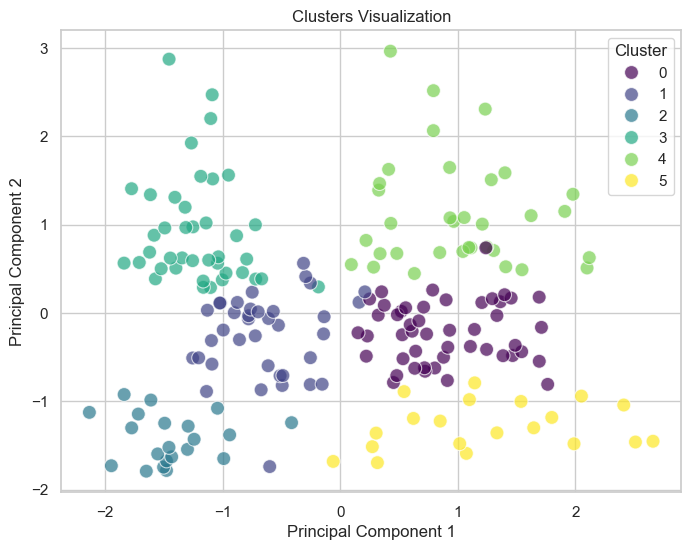

In [173]:
# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## SAVE MODEL

In [174]:
import pickle

# Save the trained model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

----